## EDA & Feature Engineering Techniques
###  House-Price Prediction

##### Author: Vineet Srivastava- MSBA (UIC)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [7]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


In [9]:
df.shape ## dimensions of our dataset

(2930, 81)

In [10]:
lst_categorical = list(df.select_dtypes(include='object'))
lst_categorical

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [11]:
lst_numerical = list(df.select_dtypes(exclude='object'))
lst_numerical

['PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

## lets check the correlation of features with target variable- saleprice

In [12]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<AxesSubplot: >

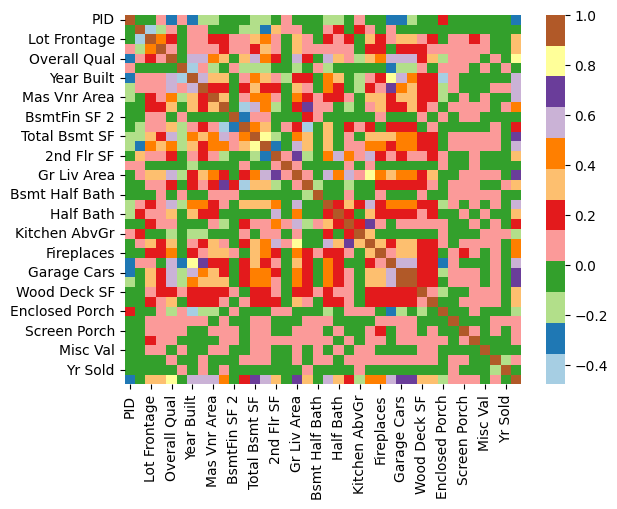

In [13]:
sns.heatmap(df.corr(),cmap="Paired")

<AxesSubplot: xlabel='Overall Qual', ylabel='SalePrice'>

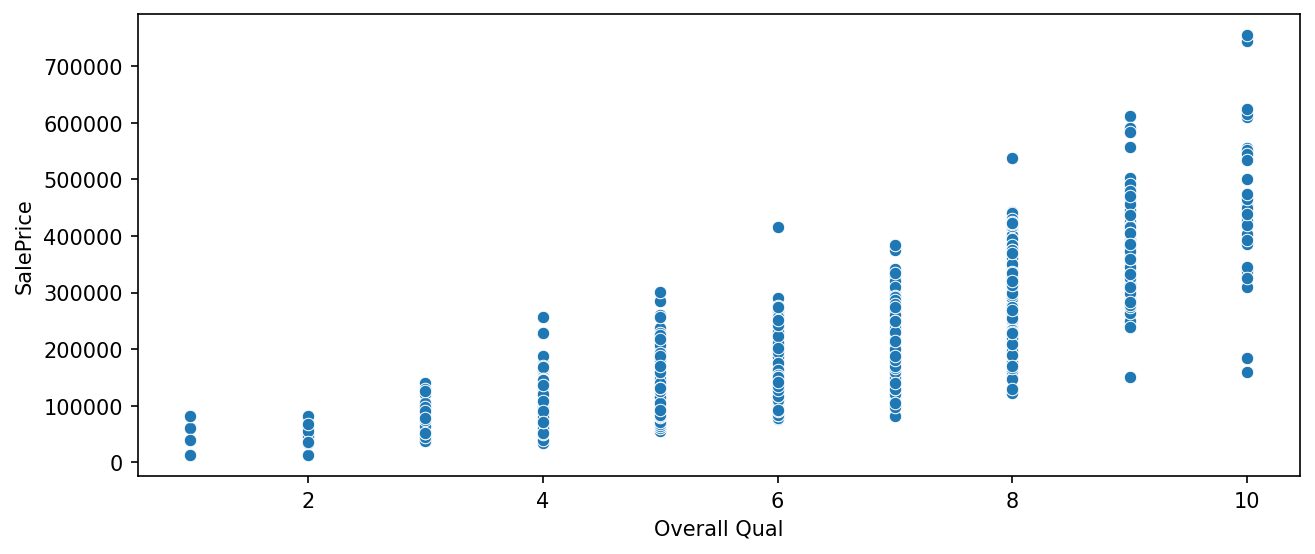

In [14]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

### we see that 3 of data-points are behaving abnormally and could be potential outliers

<AxesSubplot: xlabel='Gr Liv Area', ylabel='SalePrice'>

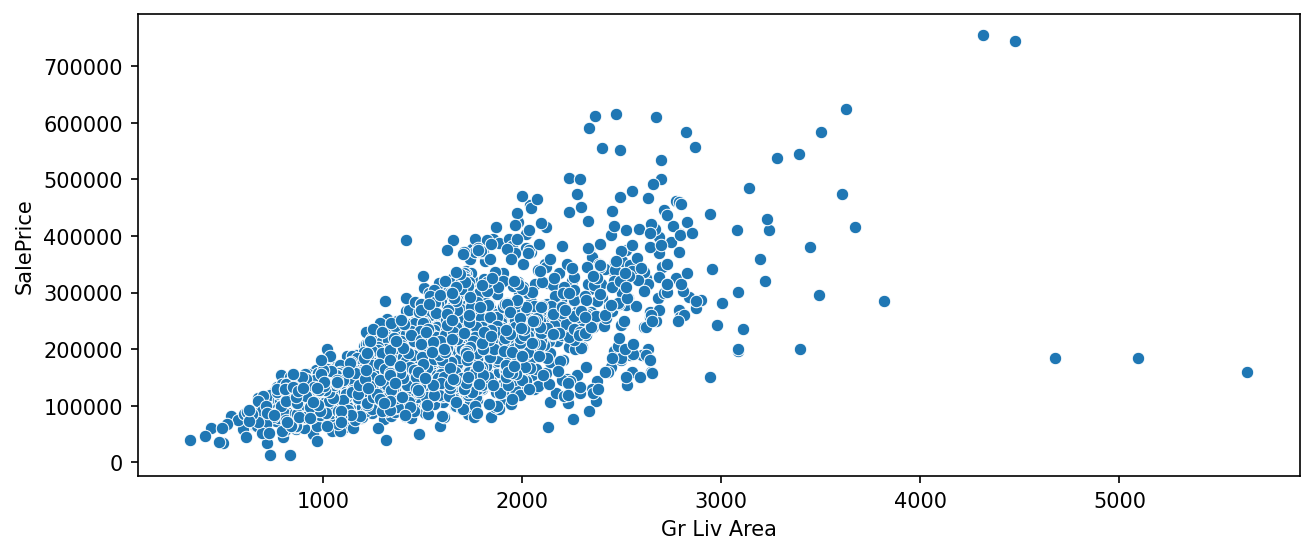

In [15]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [16]:
(df[(df['Overall Qual']>9) & (df['SalePrice']<200000)]).index

Int64Index([1498, 2180, 2181], dtype='int64')

In [17]:
(df[(df['Gr Liv Area']>4000) & (df['SalePrice']<300000)]).index

Int64Index([1498, 2180, 2181], dtype='int64')

### So we conclude that these three points are our outliers and its safe to remove them

In [18]:
drop_ind = (df[(df['Overall Qual']>9) & (df['SalePrice']<200000)]).index
drop_ind

Int64Index([1498, 2180, 2181], dtype='int64')

In [19]:
df = df.drop(drop_ind)
df.head() # so outliers removed

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


<AxesSubplot: xlabel='Overall Qual', ylabel='SalePrice'>

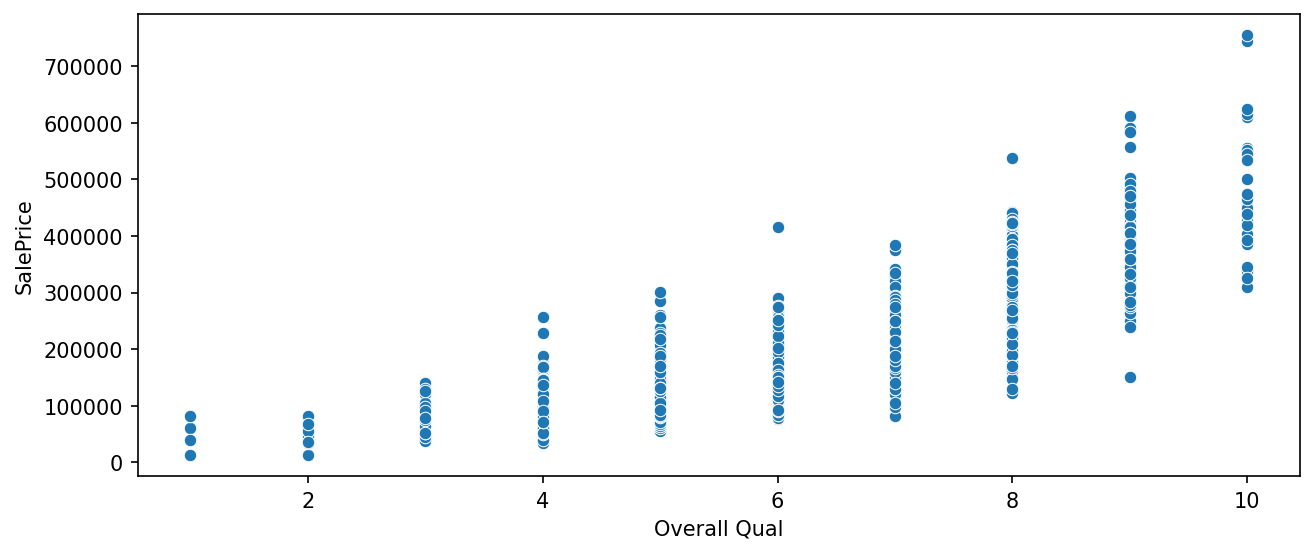

In [20]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<AxesSubplot: xlabel='Gr Liv Area', ylabel='SalePrice'>

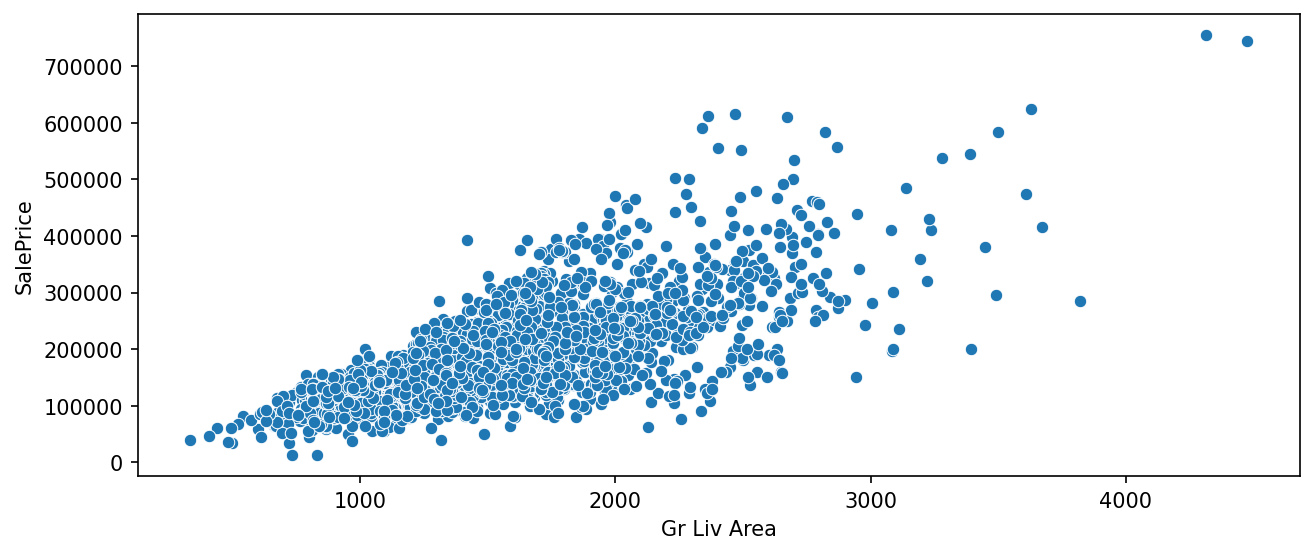

In [21]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

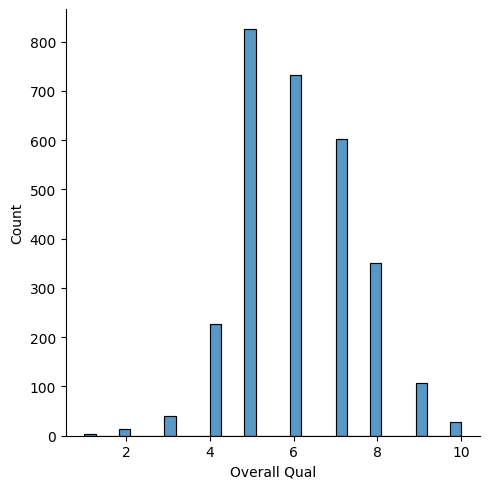

In [22]:
sns.displot(df['Overall Qual'])

In [23]:
df = df.set_index('PID')
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### check for missing values in our dataset

In [24]:
100*((df.isnull().sum())/len(df))

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [25]:
def percent_missing(df):
    percent_nan = 100*((df.isnull().sum())/len(df))
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=False)
    
    return percent_nan

In [26]:
percent_nan = percent_missing(df)
percent_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
BsmtFin SF 1       0.034165
Electrical         0.034165
dtype: float64

In [27]:
type(df)

pandas.core.frame.DataFrame

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Pool QC'),
  Text(1, 0, 'Misc Feature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Fireplace Qu'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Garage Cond'),
  Text(7, 0, 'Garage Qual'),
  Text(8, 0, 'Garage Finish'),
  Text(9, 0, 'Garage Yr Blt'),
  Text(10, 0, 'Garage Type'),
  Text(11, 0, 'Bsmt Exposure'),
  Text(12, 0, 'BsmtFin Type 2'),
  Text(13, 0, 'BsmtFin Type 1'),
  Text(14, 0, 'Bsmt Qual'),
  Text(15, 0, 'Bsmt Cond'),
  Text(16, 0, 'Mas Vnr Area'),
  Text(17, 0, 'Mas Vnr Type'),
  Text(18, 0, 'Bsmt Half Bath'),
  Text(19, 0, 'Bsmt Full Bath'),
  Text(20, 0, 'Total Bsmt SF'),
  Text(21, 0, 'Bsmt Unf SF'),
  Text(22, 0, 'Garage Cars'),
  Text(23, 0, 'Garage Area'),
  Text(24, 0, 'BsmtFin SF 2'),
  Text(25, 0, 'BsmtFin SF 1'),
  Text(26, 0, 'Electrical')])

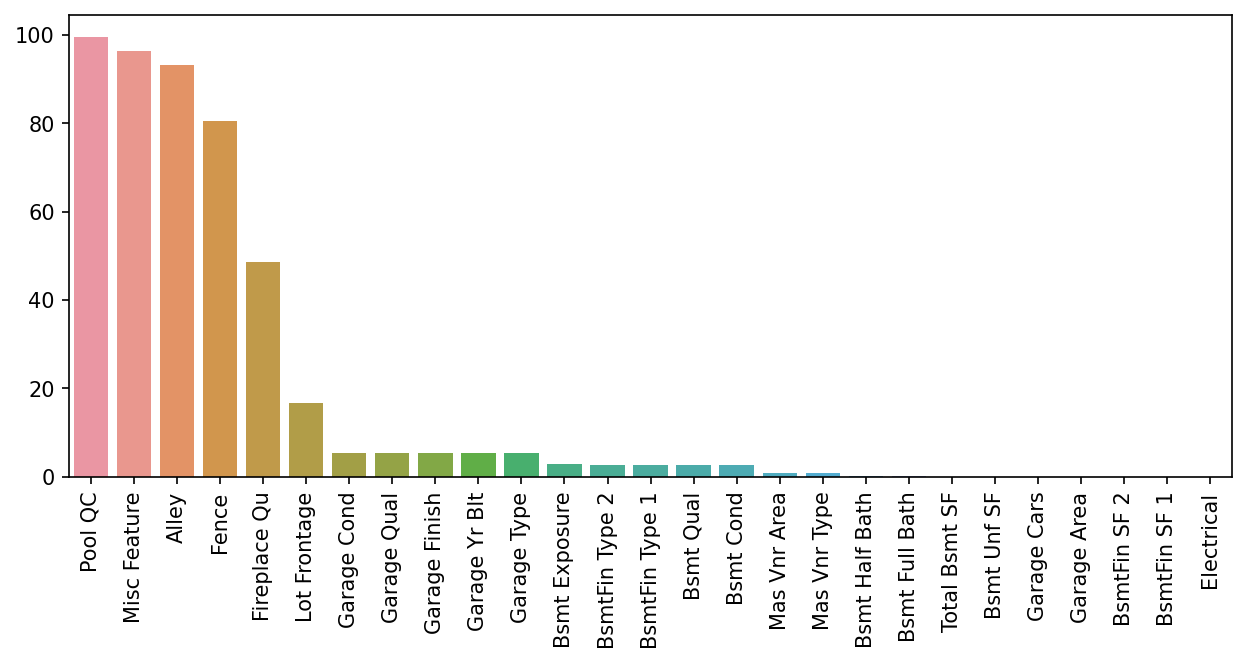

In [28]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation = 90)

(0.0, 1.0)

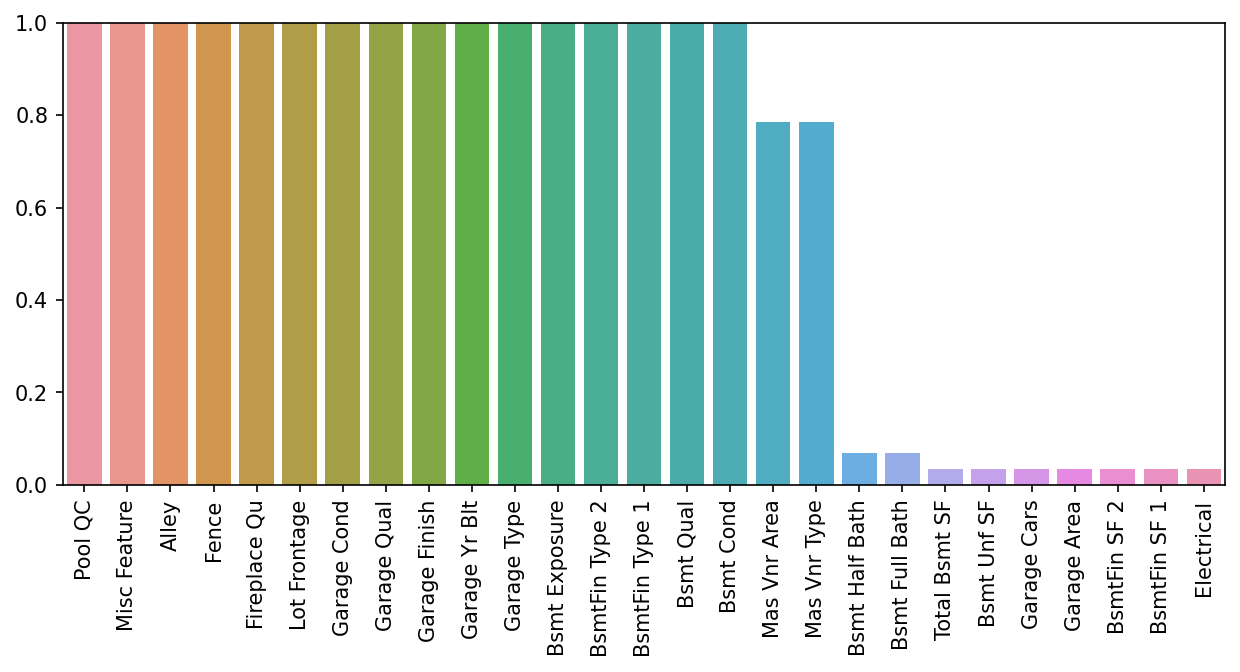

In [29]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [30]:
cols_to_drop = list((percent_nan[percent_nan<1]).index)

In [31]:
cols_to_drop

['Mas Vnr Area',
 'Mas Vnr Type',
 'Bsmt Half Bath',
 'Bsmt Full Bath',
 'Total Bsmt SF',
 'Bsmt Unf SF',
 'Garage Cars',
 'Garage Area',
 'BsmtFin SF 2',
 'BsmtFin SF 1',
 'Electrical']

In [32]:
df.shape

(2927, 80)

In [33]:
df = df.dropna(axis = 0, subset=cols_to_drop)

In [34]:
df.shape

(2900, 80)

In [35]:
percent_nan = percent_missing(df)
percent_nan

Pool QC           99.586207
Misc Feature      96.379310
Alley             93.241379
Fence             80.344828
Fireplace Qu      48.620690
Lot Frontage      16.689655
Garage Yr Blt      5.413793
Garage Finish      5.413793
Garage Qual        5.413793
Garage Cond        5.413793
Garage Type        5.379310
Bsmt Exposure      2.793103
BsmtFin Type 2     2.724138
Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
dtype: float64

In [36]:
percent_nan[percent_nan<1]

Series([], dtype: float64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Pool QC'),
  Text(1, 0, 'Misc Feature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Fireplace Qu'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Garage Yr Blt'),
  Text(7, 0, 'Garage Finish'),
  Text(8, 0, 'Garage Qual'),
  Text(9, 0, 'Garage Cond'),
  Text(10, 0, 'Garage Type'),
  Text(11, 0, 'Bsmt Exposure'),
  Text(12, 0, 'BsmtFin Type 2'),
  Text(13, 0, 'Bsmt Qual'),
  Text(14, 0, 'Bsmt Cond'),
  Text(15, 0, 'BsmtFin Type 1')])

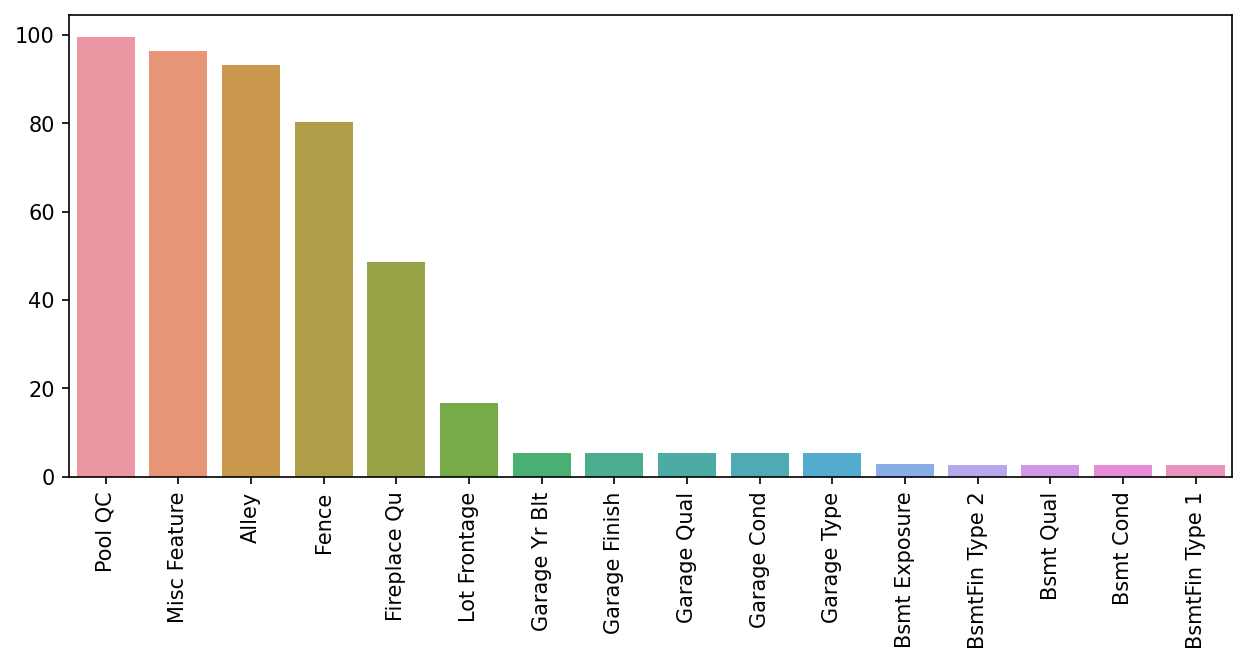

In [37]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation = 90)

In [38]:
percent_nan[percent_nan<20]

Lot Frontage      16.689655
Garage Yr Blt      5.413793
Garage Finish      5.413793
Garage Qual        5.413793
Garage Cond        5.413793
Garage Type        5.379310
Bsmt Exposure      2.793103
BsmtFin Type 2     2.724138
Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
dtype: float64

In [39]:
lst_categorical

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [40]:
gar_str_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [41]:
percent_nan = percent_missing(df)
percent_nan

Pool QC           99.586207
Misc Feature      96.379310
Alley             93.241379
Fence             80.344828
Fireplace Qu      48.620690
Lot Frontage      16.689655
Garage Yr Blt      5.413793
Bsmt Exposure      2.793103
BsmtFin Type 2     2.724138
Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
dtype: float64

In [42]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

<AxesSubplot: xlabel='Garage Yr Blt', ylabel='SalePrice'>

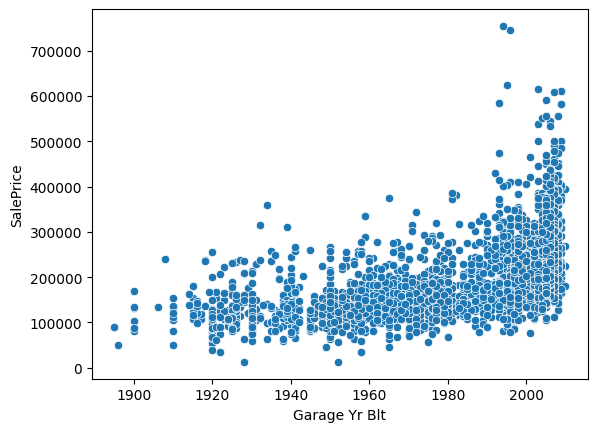

In [43]:
sns.scatterplot(x='Garage Yr Blt',y='SalePrice',data=df)

In [44]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median())

In [45]:
percent_nan = percent_missing(df)
percent_nan

Pool QC           99.586207
Misc Feature      96.379310
Alley             93.241379
Fence             80.344828
Fireplace Qu      48.620690
Lot Frontage      16.689655
Bsmt Exposure      2.793103
BsmtFin Type 2     2.724138
Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Pool QC'),
  Text(1, 0, 'Misc Feature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Fireplace Qu'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Bsmt Exposure'),
  Text(7, 0, 'BsmtFin Type 2'),
  Text(8, 0, 'Bsmt Qual'),
  Text(9, 0, 'Bsmt Cond'),
  Text(10, 0, 'BsmtFin Type 1')])

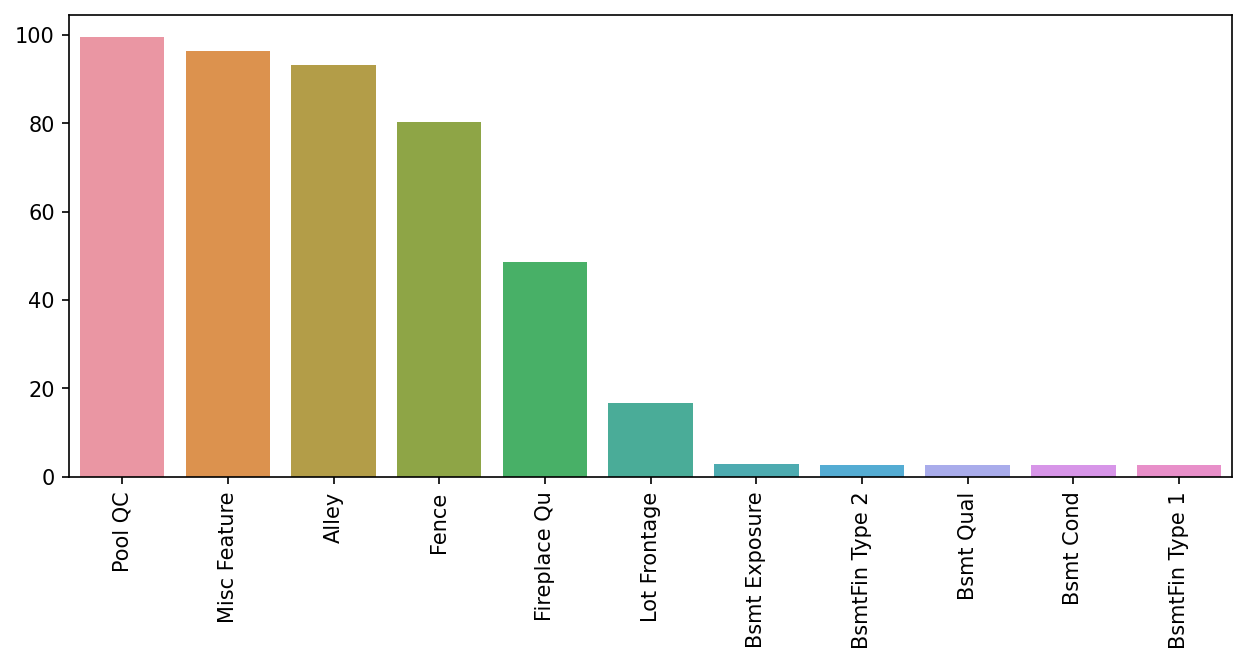

In [46]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation = 90)

In [47]:
drop_col_bye_bye = list((percent_nan[percent_nan>40]).index)

In [48]:
drop_col_bye_bye

['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']

In [49]:
df = df.drop(drop_col_bye_bye,axis=1)

In [50]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage      16.689655
Bsmt Exposure      2.793103
BsmtFin Type 2     2.724138
Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Bsmt Exposure'),
  Text(2, 0, 'BsmtFin Type 2'),
  Text(3, 0, 'Bsmt Qual'),
  Text(4, 0, 'Bsmt Cond'),
  Text(5, 0, 'BsmtFin Type 1')])

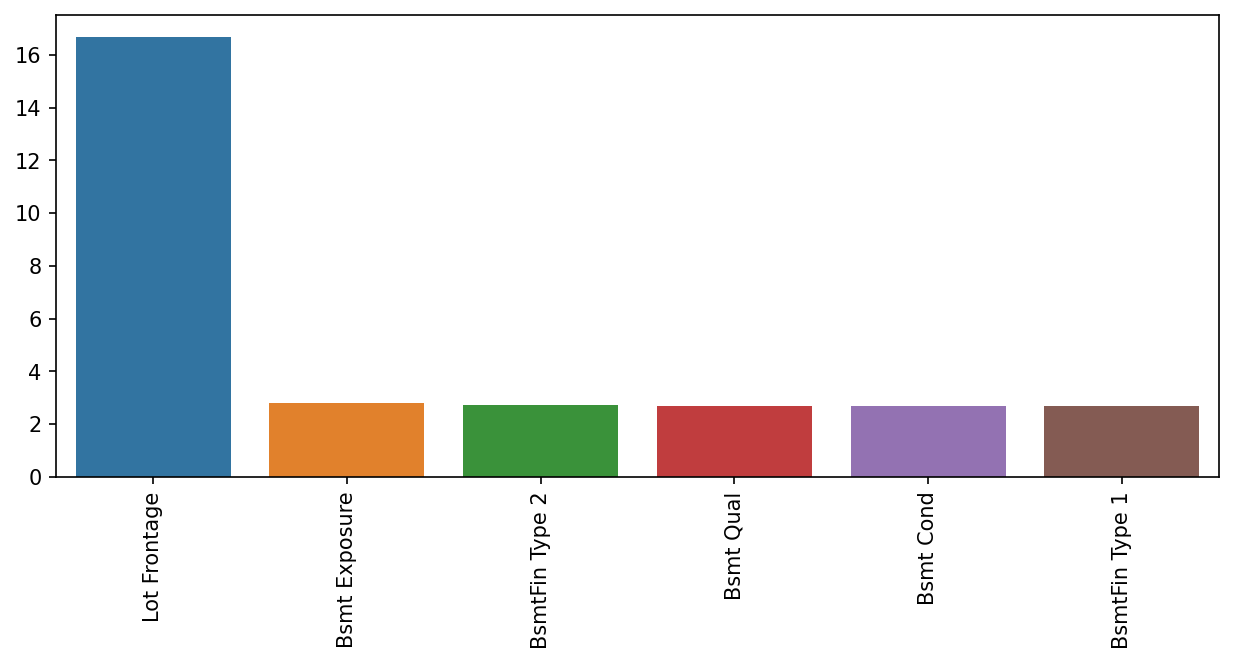

In [51]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation = 90)

In [52]:
percent_nan

Lot Frontage      16.689655
Bsmt Exposure      2.793103
BsmtFin Type 2     2.724138
Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
dtype: float64

In [53]:
bsmt_nan_drop = ['BsmtFin Type 1','Bsmt Cond','Bsmt Qual','Bsmt Qual','Bsmt Exposure']
df = df.dropna(axis = 0, subset=bsmt_nan_drop)

In [54]:
df.shape

(2819, 75)

In [55]:
df = df.dropna(axis = 0, subset=['BsmtFin Type 2'])

In [56]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.678495
dtype: float64

(array([0]), [Text(0, 0, 'Lot Frontage')])

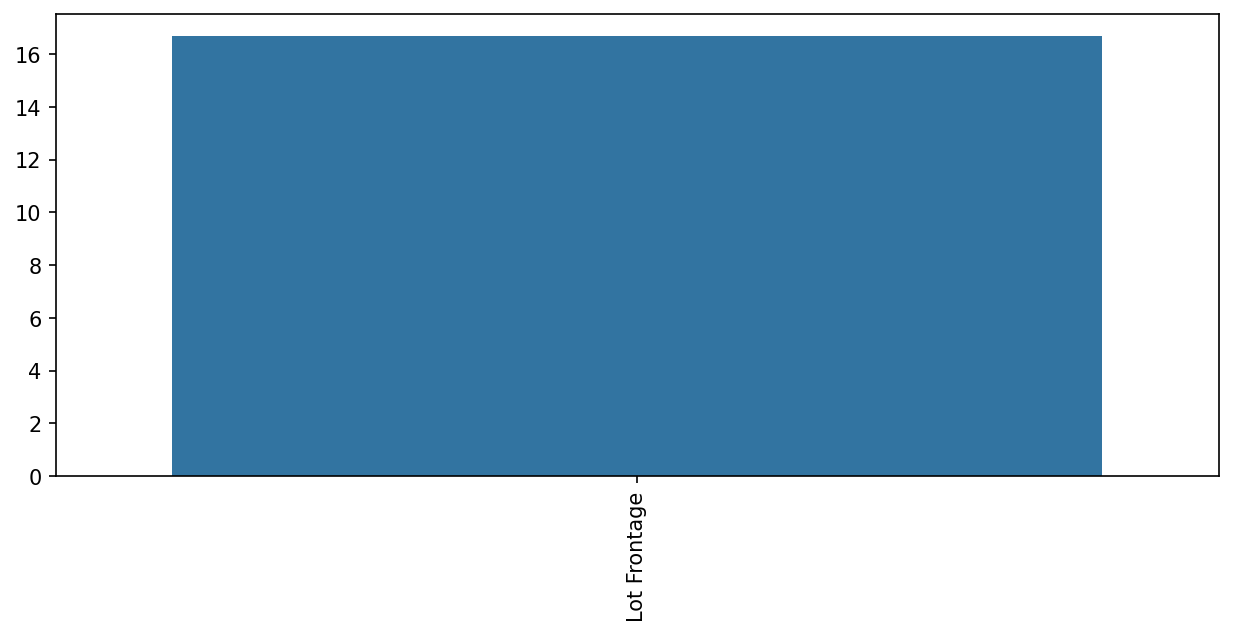

In [57]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation = 90)

In [58]:
df['Lot Frontage'].dtype

dtype('float64')

In [59]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())

In [60]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [61]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

##### All missing values handled

In [62]:
object_df = df.select_dtypes(include='object')
object_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
PID,,,,,,,,,,,,,,,,,,,,,
526301100,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
526350040,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
526351010,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
526353030,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
527105010,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [63]:
num_df = df.select_dtypes(exclude='object')
num_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [64]:
df_object_dummies = pd.get_dummies(object_df,drop_first=True)
df_object_dummies.head()

,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,
526301100,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
526350040,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
526351010,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
526353030,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
527105010,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [65]:
final_df = pd.concat([num_df,df_object_dummies],axis=1)
final_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
X = final_df.drop(['SalePrice'],axis=1)
Y = final_df['SalePrice']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train,y_train) # fit the model

LinearRegression()

In [71]:
training_data_pred = model.predict(X_train)
training_data_pred

array([214150.22003931, 195229.67382026, 352159.59130696, ...,
       277732.42189084, 165381.29004597, 108875.76840031])

In [72]:
from sklearn import metrics

In [73]:
# R Square Error
score_1 = metrics.r2_score(y_train,training_data_pred)
score_1

0.9409176400907342

<AxesSubplot: ylabel='SalePrice'>

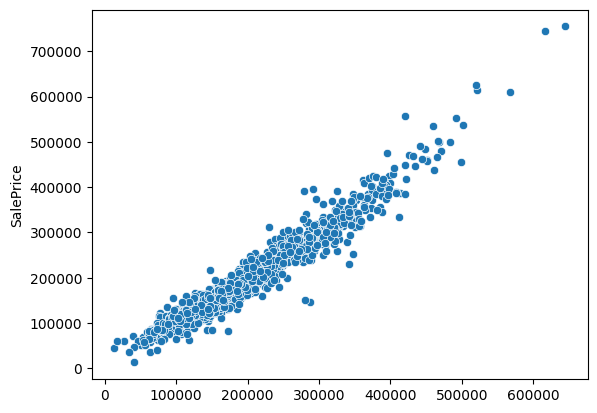

In [74]:
sns.scatterplot(x=training_data_pred,y=y_train)

In [75]:
test_data_pred = model.predict(X_test)
test_data_pred

array([114958.3819442 , 184532.24931592, 195440.26286947,  93061.12213463,
       197712.80993972, 162172.77508089, 199154.13307993, 258728.44203454,
       193725.83258339, 200581.56283304, 158020.77366182, 194239.14334094,
       206970.87039057, 158603.52298087, 181251.82454049, 274321.9074231 ,
       168945.76171765, 158819.6748352 ,  96362.17109518, 173574.33759717,
       161170.07079342, 109447.83297376, 270899.67548531, 157983.43714159,
       263934.21211295, 116859.67184387, 237657.67120017, 148205.66813108,
       363853.67835339, 333162.51939817, 121932.82557283, 242226.47931765,
       146231.51983261, 159428.25772583, 211102.23346033, 197598.07758213,
       200239.87177144, 136217.84560569, 117424.20734508, 108139.19202259,
       299137.6066199 ,  96920.57529792,  97123.72754549, 228154.03188918,
        38056.79299589, 124670.10721508, 238084.87006094, 146611.74007866,
       191183.49042086, 136926.78409158,  65912.40438399, 150722.78890179,
       152080.2265718 , 1

In [76]:
#R Squared Error
score_2 = metrics.r2_score(y_test,test_data_pred)
score_2

0.9220946769760899

<AxesSubplot: ylabel='SalePrice'>

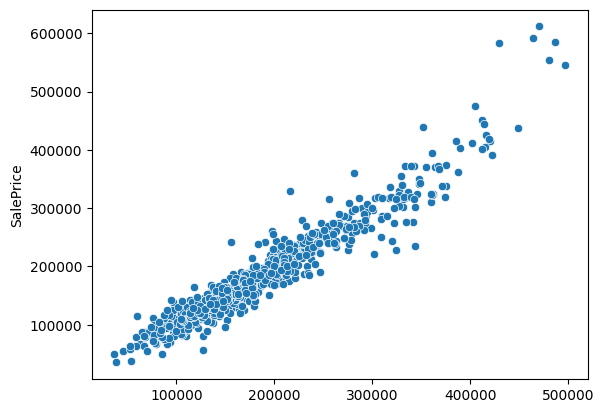

In [77]:
sns.scatterplot(x=test_data_pred,y=y_test)

##### We observer 92% R2 score on our test data and 94% on training data

In [78]:
y_pred = test_data_pred

In [79]:
residuals = y_test - y_pred

<AxesSubplot: ylabel='SalePrice'>

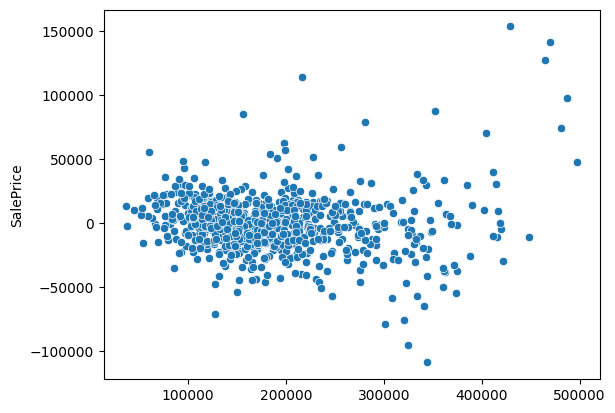

In [80]:
sns.scatterplot(x=y_pred,y=residuals)

In [81]:
X = final_df.drop(['SalePrice'],axis=1)
Y = final_df['SalePrice']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
scaled_X_train = scaler.fit_transform(X_train)

In [88]:
scaled_X_test = scaler.transform(X_test)

In [89]:
from sklearn.linear_model import ElasticNet

In [90]:
base_elastic_model = ElasticNet()

In [95]:
param_grid = {'alpha':[0.1,1,5,10,100],'l1_ratio':[.1,.7,.99,1]}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
grid_model = GridSearchCV(base_elastic_model,
param_grid=param_grid,
scoring='neg_mean_squared_error',
cv=5,verbose=1)

In [99]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.571e+11, tolerance: 1.334e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.373e+11, tolerance: 1.277e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [100]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [101]:
y_pred = grid_model.predict(scaled_X_test)

In [102]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [103]:
mean_absolute_error(y_test,y_pred)

15589.239952653079

In [104]:
np.sqrt(mean_squared_error(y_test, y_pred))

23952.326098157166

In [105]:
score_2 = metrics.r2_score(y_test,y_pred)
score_2

0.8897475010307896

In [116]:
y_test.shape

(282,)